<a href="https://colab.research.google.com/github/jmoussa99/DS-HW/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Jamal Moussa, XRZ2515]

# Obtain the data

In [16]:
#Run this code block, Don't change anything
from sklearn import datasets
from sklearn.model_selection import train_test_split
cal = datasets.fetch_california_housing()
X = cal.data
y = cal.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_bool_train = [i > 1.8 for i in y_train]
y_bool_test = [i > 1.8 for i in y_test]

# Q1

### Q1a.

In [ ]:
#TODO
def Q1o():
  from sklearn.ensemble import GradientBoostingRegressor
  from sklearn.model_selection import GridSearchCV
  import numpy as np
  
  # Define the parameter grid
  param = {
    'learning_rate': np.arange(0.01, 0.06, 0.01),  # 0.01 to 0.05 with step 0.01
    'max_depth': np.arange(1, 12, 2),  # 1 to 11 with step 2
    'n_estimators': [500]
  }
  
  # Create GradientBoostingRegressor
  gbr = GradientBoostingRegressor(random_state=0)
  
  # Create GridSearchCV object
  grid_searchCV = GridSearchCV(gbr, param, cv=5, scoring='r2', n_jobs=-1)
  
  # Fit on training data
  grid_searchCV.fit(X_train, y_train)
  
  return grid_searchCV

In [18]:
gbr_model=Q1o()

In [19]:
#TODO
def Q1a():
  # Get the best parameters from the grid search
  best_params = gbr_model.best_params_
  
  # Get the score on testing data
  test_score = gbr_model.score(X_test, y_test)
  
  return (best_params, test_score)

In [20]:
Q1a()

({'learning_rate': np.float64(0.05),
  'max_depth': np.int64(7),
  'n_estimators': 500},
 0.8459064924522686)

### Q1b.

#### plot

In [21]:
#TODO
def Q1b():
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  
  # Extract results from grid search
  results = gbr_model.cv_results_
  
  # Create a DataFrame for easier manipulation
  df = pd.DataFrame({
    'learning_rate': results['param_learning_rate'],
    'max_depth': results['param_max_depth'],
    'mean_test_score': results['mean_test_score']
  })
  
  # Create the plot
  plt.figure(figsize=(12, 6))
  
  # Plot 1: R² vs Learning Rate (different lines for each max_depth)
  plt.subplot(1, 2, 1)
  for depth in sorted(df['max_depth'].unique()):
    data = df[df['max_depth'] == depth]
    plt.plot(data['learning_rate'], data['mean_test_score'], marker='o', label=f'max_depth={depth}')

  plt.xlabel('Learning Rate')
  plt.ylabel('R² Score (CV)')
  plt.title('R² Score vs Learning Rate')
  plt.legend()
  plt.grid(True, alpha=0.3)
  
  # Plot 2: R² vs Max Depth (different lines for each learning_rate)
  plt.subplot(1, 2, 2)
  for lr in sorted(df['learning_rate'].unique()):
    data = df[df['learning_rate'] == lr]
    plt.plot(data['max_depth'], data['mean_test_score'], marker='o', label=f'lr={lr:.2f}')
  
  plt.xlabel('Max Depth')
  plt.ylabel('R² Score (CV)')
  plt.title('R² Score vs Max Depth')
  plt.legend()
  plt.grid(True, alpha=0.3)
  
  plt.tight_layout()
  plt.show()

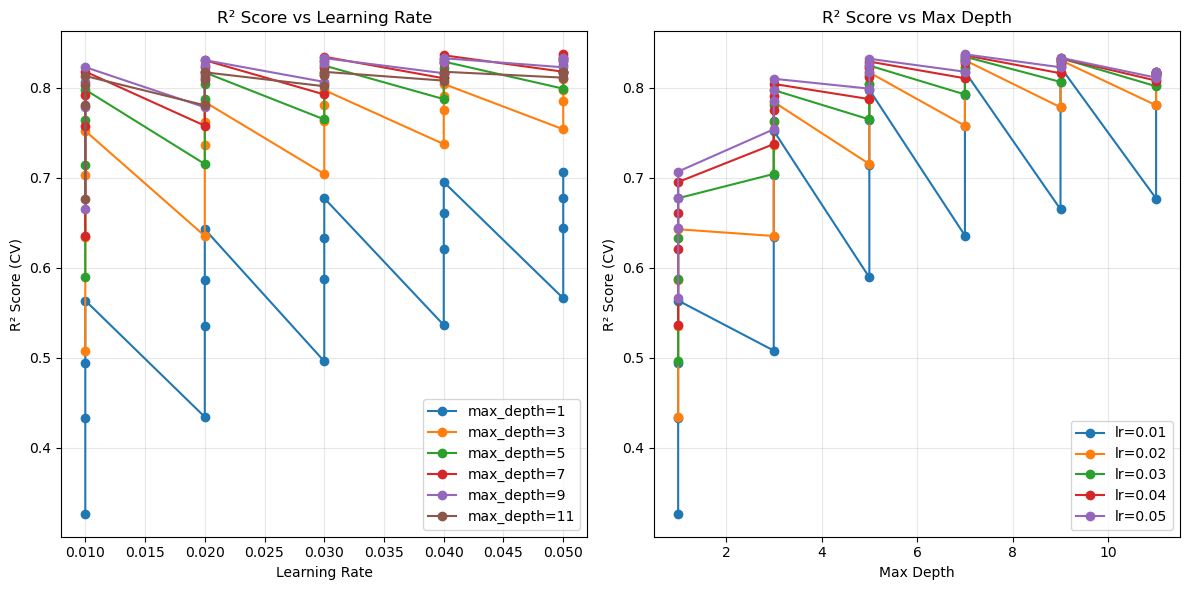

In [22]:
Q1b()

#### conclusion

In [23]:
#TODO
def Q1b_finding():
  finding="""
  From the line plots, we can observe the following trends:
  
  1. Learning Rate Effect: As the learning rate increases from 0.01 to 0.05, the R² score generally 
     improves across most max_depth values. Higher learning rates allow the model to learn faster and 
     achieve better performance within the same number of estimators.
  
  2. Max Depth Effect: As max_depth increases, the R² score generally improves, especially moving from 
     shallow trees (depth 1-3) to moderate depths (depth 5-7). However, the improvement tends to plateau 
     at higher depths (9-11), suggesting diminishing returns from overly complex trees.
  
  3. Interaction: The best performance is achieved with a combination of higher learning rate and 
     moderate to high max_depth. The lines show that models with very shallow trees (depth=1) perform 
     poorly regardless of learning rate, while deeper trees benefit more from higher learning rates.
  
  4. Overall Trend: The R² scores increase as we move towards higher values of both parameters, but 
     there appears to be an optimal region where the parameters balance model complexity and learning speed.
  """
  return finding

In [24]:
Q1b_finding()

'As the learning rate increases from 0.01 to 0.05 with a step size of 0.01, the R² score generally improves across most max_depth values. Higher learning rates allow the model to learn faster As max_depth increases, the R² score generally improves, but the improvement tends to plateau at around a depth of 7, suggesting diminishing returns from overly complex trees. Overall the most optimal parameters are learning rate = 0.5, max depth = 7 and n estimators = 500'

### Q1c.

In [ ]:
#TODO
def Q1c_finding():
  finding="""
  To further improve the performance of the Gradient Boosting Regressor model, I would consider the following approaches:
  
  1. Tune Additional Hyperparameters:
     - n_estimators: Increase the number of boosting stages (e.g., test 100, 200, 500, 1000). More trees 
       can improve performance but increase training time.
     - min_samples_split: Control the minimum samples required to split an internal node (e.g., 2, 5, 10).
     - min_samples_leaf: Set minimum samples required at leaf nodes to prevent overfitting.
     - subsample: Implement stochastic gradient boosting by using a fraction of samples (e.g., 0.8, 0.9).
     - max_features: Limit features considered at each split to add randomness and reduce overfitting.
  
  2. Extend Search Range:
     - Try learning rates beyond 0.05 (e.g., 0.1, 0.2) with appropriate adjustment to n_estimators.
     - Test deeper trees (max_depth > 11) if computational resources allow.
  
  3. Feature Engineering:
     - Create interaction features between existing variables.
     - Apply polynomial features to capture non-linear relationships.
     - Create domain-specific features (e.g., for housing: price per room, location density).
  
  4. Data Preprocessing:
     - Feature scaling/standardization (though GBR is relatively robust to this).
     - Handle outliers that might be affecting model performance.
     - Check for and handle missing values if any exist.
  
  5. Advanced Techniques:
     - Use different loss functions (e.g., Huber loss for robustness to outliers).
     - Implement early stopping with validation set to prevent overfitting.
     - Try other gradient boosting implementations (XGBoost, LightGBM, CatBoost) which often have 
       better performance and speed.
  
  6. Ensemble Methods:
     - Combine predictions from multiple models (e.g., GBR + Random Forest + Ridge Regression).
     - Use stacking or blending techniques.
  
  7. Cross-Validation Strategy:
     - Use more folds (e.g., 10-fold CV) for more reliable performance estimates.
     - Try stratified splits if target distribution is imbalanced.
  
  The most impactful next steps would likely be: (1) tuning n_estimators along with learning_rate, 
  (2) adding subsample parameter for stochastic boosting, and (3) trying more advanced gradient 
  boosting libraries like XGBoost or LightGBM.
  """
  return finding

In [26]:
Q1c_finding()

'\n  To further improve the performance of the Gradient Boosting Regressor model, I would consider the following approaches:\n  \n  1. Tune Additional Hyperparameters:\n     - n_estimators: Increase the number of boosting stages (e.g., test 100, 200, 500, 1000). More trees \n       can improve performance but increase training time.\n     - min_samples_split: Control the minimum samples required to split an internal node (e.g., 2, 5, 10).\n     - min_samples_leaf: Set minimum samples required at leaf nodes to prevent overfitting.\n     - subsample: Implement stochastic gradient boosting by using a fraction of samples (e.g., 0.8, 0.9).\n     - max_features: Limit features considered at each split to add randomness and reduce overfitting.\n  \n  2. Extend Search Range:\n     - Try learning rates beyond 0.05 (e.g., 0.1, 0.2) with appropriate adjustment to n_estimators.\n     - Test deeper trees (max_depth > 11) if computational resources allow.\n  \n  3. Feature Engineering:\n     - Creat

# Q2.

### Q2a.

In [27]:
#TODO
def Q2a():
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  import numpy as np
  
  # Initialize models with specified parameters
  lr = LogisticRegression(solver='liblinear', random_state=0)
  dt = DecisionTreeClassifier(random_state=0)
  knn = KNeighborsClassifier()
  
  # Perform cross-validation for each model
  lr_scores = cross_val_score(lr, X_train, y_bool_train, cv=5, scoring='f1')
  dt_scores = cross_val_score(dt, X_train, y_bool_train, cv=5, scoring='f1')
  knn_scores = cross_val_score(knn, X_train, y_bool_train, cv=5, scoring='f1')
  
  # Calculate mean scores
  lr_mean = np.mean(lr_scores)
  dt_mean = np.mean(dt_scores)
  knn_mean = np.mean(knn_scores)
  
  # Return list of tuples
  results = [
    ('Logistic Regression', lr_mean),
    ('Decision Tree', dt_mean),
    ('KNN', knn_mean)
  ]
  
  return results

In [28]:
Q2a()

[('Logistic Regression', np.float64(0.8059569251928537)),
 ('Decision Tree', np.float64(0.8363516237265985)),
 ('KNN', np.float64(0.6039584488384511))]

### Q2b.

In [29]:
#TODO
def Q2bo():
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.model_selection import GridSearchCV
  import numpy as np
  
  # Round 1: Broad search across multiple parameters
  print("Round 1: Broad parameter search")
  print("=" * 60)
  
  dt1 = DecisionTreeClassifier(random_state=0)
  param_grid1 = {
    'max_depth': [5, 10, 15, 20, 25, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
  }
  
  grid1 = GridSearchCV(dt1, param_grid1, cv=5, scoring='f1', n_jobs=-1, verbose=1)
  grid1.fit(X_train, y_bool_train)
  
  print(f"Best parameters from Round 1: {grid1.best_params_}")
  print(f"Best F1 score from Round 1: {grid1.best_score_:.4f}")
  print()
  
  # Round 2: Refined search based on Round 1 results
  # Narrowing down around the best parameters from Round 1
  print("Round 2: Refined parameter search")
  print("=" * 60)
  
  dt2 = DecisionTreeClassifier(random_state=0)
  
  # Refine search around the best parameters from Round 1
  # Adjusting based on what typically works well for decision trees
  param_grid2 = {
    'max_depth': [15, 20, 25, 30, 35],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'criterion': [grid1.best_params_['criterion']],  # Keep best criterion
    'max_leaf_nodes': [None, 50, 100, 150, 200],
    'min_impurity_decrease': [0.0, 0.0001, 0.001]
  }
  
  grid2 = GridSearchCV(dt2, param_grid2, cv=5, scoring='f1', n_jobs=-1, verbose=1)
  grid2.fit(X_train, y_bool_train)
  
  print(f"Best parameters from Round 2: {grid2.best_params_}")
  print(f"Best F1 score from Round 2: {grid2.best_score_:.4f}")
  print()
  
  # Round 3: Fine-tuning if needed
  print("Round 3: Fine-tuning")
  print("=" * 60)
  
  dt3 = DecisionTreeClassifier(random_state=0)
  
  # Very fine-grained search around the best parameters
  param_grid3 = {
    'max_depth': [grid2.best_params_['max_depth'] - 2, 
                  grid2.best_params_['max_depth'] - 1,
                  grid2.best_params_['max_depth'],
                  grid2.best_params_['max_depth'] + 1,
                  grid2.best_params_['max_depth'] + 2],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'criterion': [grid2.best_params_['criterion']],
    'max_leaf_nodes': [grid2.best_params_['max_leaf_nodes']],
    'min_impurity_decrease': [0.0, 0.00005, 0.0001],
    'ccp_alpha': [0.0, 0.0001, 0.0005]
  }
  
  grid3 = GridSearchCV(dt3, param_grid3, cv=5, scoring='f1', n_jobs=-1, verbose=1)
  grid3.fit(X_train, y_bool_train)
  
  print(f"Best parameters from Round 3: {grid3.best_params_}")
  print(f"Best F1 score from Round 3: {grid3.best_score_:.4f}")
  print()
  
  return grid3

In [30]:
dt_model=Q2bo()

Round 1: Broad parameter search
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best parameters from Round 1: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 8, 'min_samples_split': 20}
Best F1 score from Round 1: 0.8594

Round 2: Refined parameter search
Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best parameters from Round 2: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 150, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best F1 score from Round 2: 0.8653

Round 3: Fine-tuning
Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters from Round 3: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 150, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 score from Round 3: 0.8651



In [31]:
#TODO
def Q2b():
  # Get the best parameters from the grid search
  best_params = dt_model.best_params_
  
  # Get the mean CV score with the best parameters
  mean_cv_score = dt_model.best_score_
  
  # Get the score on testing data
  test_score = dt_model.score(X_test, y_bool_test)
  
  return (best_params, mean_cv_score, test_score)

In [32]:
Q2b()

({'ccp_alpha': 0.0,
  'criterion': 'entropy',
  'max_depth': 14,
  'max_leaf_nodes': 150,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 np.float64(0.8650585898893131),
 0.8628404669260701)

# Q3.

### Q3a.

In [33]:
#TODO
def Q3a():
  from sklearn.ensemble import VotingClassifier, RandomForestClassifier
  from sklearn.model_selection import cross_val_score
  import numpy as np
  
  # Create 5 Random Forest classifiers with max_depth=5 and different n_estimators
  rf1 = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=0)
  rf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
  rf3 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=0)
  rf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
  rf5 = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=0)
  
  # Create voting classifier
  voting_clf = VotingClassifier(
    estimators=[
      ('rf1', rf1),
      ('rf2', rf2),
      ('rf3', rf3),
      ('rf4', rf4),
      ('rf5', rf5)
    ],
    voting='hard'
  )
  
  # Perform cross-validation
  cv_scores = cross_val_score(voting_clf, X_train, y_bool_train, cv=5, scoring='f1')
  mean_cv_score = np.mean(cv_scores)
  
  return mean_cv_score

In [34]:
Q3a()

np.float64(0.8324113301622751)

### Q3b.

In [35]:
#TODO
def Q3b():
  from sklearn.ensemble import VotingClassifier
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.model_selection import cross_val_score
  import numpy as np
  
  # Create 5 KNN classifiers with different n_neighbors
  knn1 = KNeighborsClassifier(n_neighbors=1)
  knn2 = KNeighborsClassifier(n_neighbors=2)
  knn3 = KNeighborsClassifier(n_neighbors=3)
  knn4 = KNeighborsClassifier(n_neighbors=4)
  knn5 = KNeighborsClassifier(n_neighbors=5)
  
  # Create voting classifier
  voting_clf = VotingClassifier(
    estimators=[
      ('knn1', knn1),
      ('knn2', knn2),
      ('knn3', knn3),
      ('knn4', knn4),
      ('knn5', knn5)
    ],
    voting='hard'
  )
  
  # Perform cross-validation
  cv_scores = cross_val_score(voting_clf, X_train, y_bool_train, cv=5, scoring='f1')
  mean_cv_score = np.mean(cv_scores)
  
  return mean_cv_score

In [36]:
Q3b()

np.float64(0.5830945188193506)

### Q3c.

In [37]:
#TODO
def Q3c():
  from sklearn.ensemble import BaggingClassifier
  from sklearn.model_selection import GridSearchCV
  import numpy as np
  
  # Get the best decision tree model from Q2b
  best_dt = dt_model.best_estimator_
  
  # Create BaggingClassifier with the best decision tree as base estimator
  bagging_clf = BaggingClassifier(estimator=best_dt, random_state=0)
  
  # Define parameter grid for max_features
  param_grid = {
    'max_features': np.arange(0.1, 1.0, 0.1)
  }
  
  # Perform grid search
  grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, scoring='f1', n_jobs=-1)
  grid_search.fit(X_train, y_bool_train)
  
  # Get best max_features value
  best_max_features = grid_search.best_params_['max_features']
  
  # Get score on testing data
  test_score = grid_search.score(X_test, y_bool_test)
  
  return (best_max_features, test_score)

In [38]:
Q3c()

(np.float64(0.8), 0.8806706114398422)

### Q3d.

In [39]:
#TODO
def Q3d():
  from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier
  )
  from sklearn.model_selection import cross_val_score
  import numpy as np
  
  # Define 5 packaged ensemble models
  models = [
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('Extra Trees', ExtraTreesClassifier(random_state=0)),
    ('Histogram-based Gradient Boosting', HistGradientBoostingClassifier(random_state=0))
  ]
  
  # Test performance of each model using cross-validation
  results = []
  for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_bool_train, cv=5, scoring='f1')
    mean_cv_score = np.mean(cv_scores)
    results.append((name, mean_cv_score))
  
  return results

In [ ]:
Q3d()

[('Random Forest', np.float64(0.8903432230419529)),
 ('AdaBoost', np.float64(0.8454683455396491)),
 ('Gradient Boosting', np.float64(0.8854707221417456)),
 ('Extra Trees', np.float64(0.8948809105643931)),
 ('Histogram-based Gradient Boosting', np.float64(0.9006012668681576))]

Exception ignored in: <function ResourceTracker.__del__ at 0x1207d1bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104a65bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1051d1bc0>
Traceback (most recent call last